In [94]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sys

In [95]:
#threshold = sys.maxsize
threshold = 1e10
file_name_with_preprocessing = "./data/preprocessing_"+str(int(threshold))+"_results.csv"
file_name_no_processing = f"./data/no_preprocessing{int(threshold)}.csv"
plot_name = "./data/reprocessing_" + str(int(threshold)) + "_plot.png"

In [96]:
qubits_required_no_preprocessing = np.genfromtxt(file_name_no_processing,
    delimiter=',',
    skip_header=1,
    dtype='int'
                                                )
                                                
qubits_required_with_preprocessing = np.genfromtxt(file_name_with_preprocessing,
                                                    delimiter=',',
                                                    skip_header=1,
                                                    dtype='int'
                                                    )

In [97]:
def exp_func(x, a, b):
    return a * np.power(x, b)

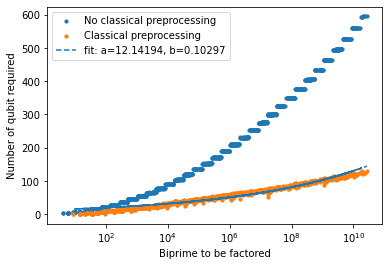

In [98]:
data_1 = np.array(qubits_required_no_preprocessing)
data_2 = np.array(qubits_required_with_preprocessing)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(data_1[:, 0], data_1[:, 1], label="No classical preprocessing", s=10)
ax.scatter(data_2[:, 0], data_2[:, 1], label="Classical preprocessing", s=10)

popt, pcov = curve_fit(exp_func, data_2[:, 0], data_2[:, 1])

plt.plot(data_2[:, 0], exp_func(data_2[:, 0], *popt), '--',
         label='fit: a=%5.5f, b=%5.5f' % tuple(popt))
         
ax.set_xlabel("Biprime to be factored")
ax.set_ylabel("Number of qubit required")
ax.set_xscale('log')
plt.legend()
plt.savefig(plot_name)
plt.show()

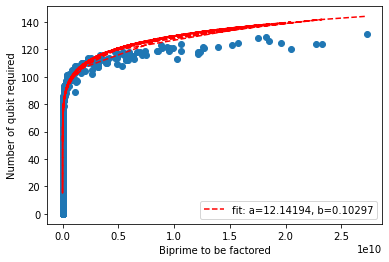

In [99]:
x = data_2[:, 0]
y = data_2[:, 1]

popt, pcov = curve_fit(exp_func, x, y)

plt.scatter(x, y)
plt.plot(x, exp_func(x, *popt), 'r--',
         label='fit: a=%5.5f, b=%5.5f' % tuple(popt))
plt.xlabel('Biprime to be factored')
plt.ylabel('Number of qubit required')
plt.legend()
plt.show()

In [100]:
a = popt[0]
b = popt[1]
a * np.power(1e4, b) 

31.346292400868897